In [0]:
import random

from cv2 import imread
import matplotlib.pyplot as plt
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow 2.x selected.


# NN Classifier with pre-trained

**Objectif :** Test different pre-trained models

We test 4 models in this notebook :
* VGG16
* Inception v3
* Resnet50
* Mobilnet

It is difficult to quantify the error because the image labels and output labels are not same, there are 8 labels vs 1000 for vgg16.

# Import data

Data from my google drive. Then unzip.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import zipfile

with zipfile.ZipFile('/content/drive/My Drive/Data/VET2.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Global variables

In [0]:
FOLDER_PATH = "vet2/"

TRAIN_DATA_PATH = FOLDER_PATH + "train/"
TEST_DATA_PATH = FOLDER_PATH + "train/"
VALID_DATA_PATH = FOLDER_PATH + "valid/"

BATCH_SIZE = 128

In [0]:
def imshow(image):
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    plt.show()

# VGG16

Found 382 images belonging to 8 classes.
-----------------------------
('jersey', 0.9200804)
tees


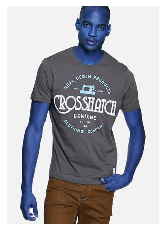

-----------------------------
('jersey', 0.7159903)
tees


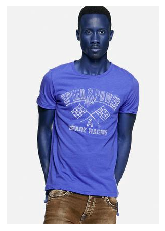

-----------------------------
('sweatshirt', 0.40389195)
shirts


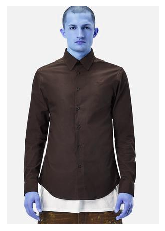

-----------------------------
('running_shoe', 0.9919437)
shoes


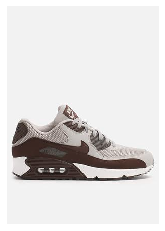

-----------------------------
('knee_pad', 0.32192928)
shoes


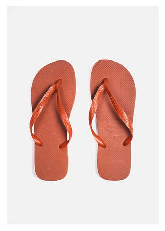

-----------------------------
('sleeping_bag', 0.715845)
shoes


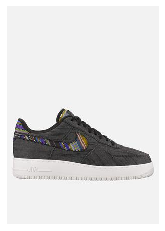

-----------------------------
('running_shoe', 0.8496887)
shoes


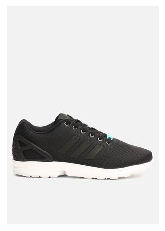

-----------------------------
('jersey', 0.53681564)
tees


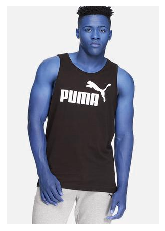

-----------------------------
('clog', 0.44758353)
shoes


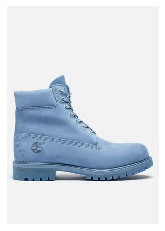

-----------------------------
('jersey', 0.4443336)
tees


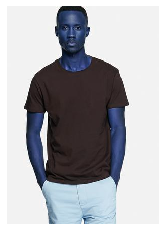

In [0]:
val_vgg_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)

val_vgg_generator = val_vgg_datagen.flow_from_directory(
        directory=VALID_DATA_PATH,
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode="categorical",
        target_size=(224, 224)
    )

# Buid model
vgg_model = vgg16.VGG16(weights='imagenet')
# Get all output for each sample
output = vgg_model.predict(val_vgg_generator)

# Transform the output vectors to string labels
decode = vgg16.decode_predictions(output)

paths = val_vgg_generator.filepaths
true_labels = val_vgg_generator.labels

# Correspondence between output vector and label names
dict_l = val_vgg_generator.class_indices

# Get 10 random indexes
idx_list = random.sample(range(len(decode)), 10)

labels = list(dict_l.keys())
for idx in idx_list:
    print("-----------------------------")
    print(decode[idx][0][1:]) # Labels predict and its confidence value
    print(labels[true_labels[idx]]) # true_labels[idx] -> Ixd in one hot encoder
    imshow(imread(paths[idx]))

# ResNet50

Found 382 images belonging to 8 classes.
-----------------------------
('knee_pad', 0.12704842)
knitwear


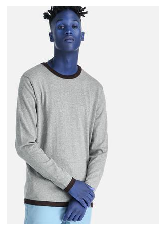

-----------------------------
('cardigan', 0.8219108)
knitwear


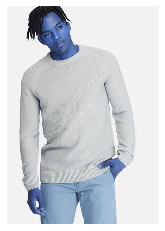

-----------------------------
('running_shoe', 0.8605655)
shoes


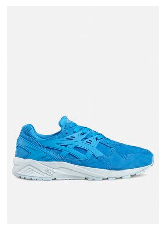

-----------------------------
('jean', 0.1782594)
jeans


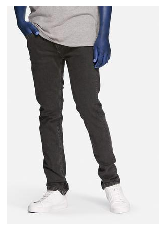

-----------------------------
('washer', 0.425725)
shoes


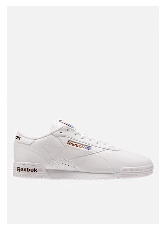

-----------------------------
('jean', 0.6724322)
jeans


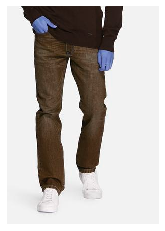

-----------------------------
('running_shoe', 0.15548828)
shoes


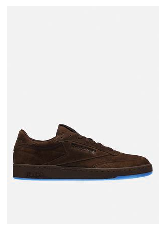

-----------------------------
('running_shoe', 0.6376521)
shoes


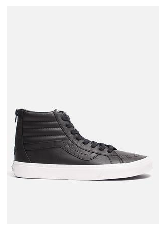

-----------------------------
('jersey', 0.4049613)
tees


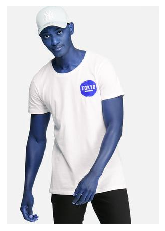

-----------------------------
('Loafer', 0.7550001)
shoes


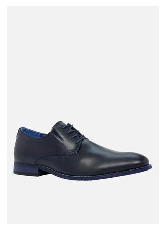

In [0]:
# Create dataset
val_res_datagen = ImageDataGenerator(preprocessing_function=resnet50.preprocess_input)
val_res_generator = val_res_datagen.flow_from_directory(
        directory=VALID_DATA_PATH,
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode="categorical",
        target_size=(224, 224)
    )

# Buid model
res_model = resnet50.ResNet50(weights='imagenet')
# Get all output for each sample
output = res_model.predict(val_res_generator)

# Transform the output vectors to string labels
decode = resnet50.decode_predictions(output)

paths = val_res_generator.filepaths
true_labels = val_res_generator.labels

# Correspondence between output vector and label names
dict_l = val_res_generator.class_indices

# Get 10 random indexes
idx_list = random.sample(range(len(decode)), 10)

labels = list(dict_l.keys())
for idx in idx_list:
    print("-----------------------------")
    print(decode[idx][0][1:]) # Labels predict and its confidence value
    print(labels[true_labels[idx]]) # true_labels[idx] -> Ixd in one hot encoder
    imshow(imread(paths[idx]))

# Inception v3

Found 382 images belonging to 8 classes.
-----------------------------
('pajama', 0.9981616)
shirts


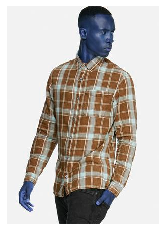

-----------------------------
('jean', 0.65917003)
knitwear


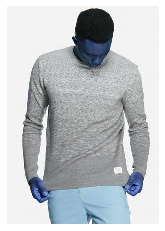

-----------------------------
('jean', 0.873169)
tees


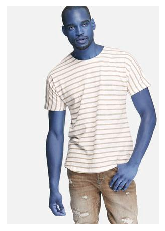

-----------------------------
('muzzle', 0.9985678)
shoes


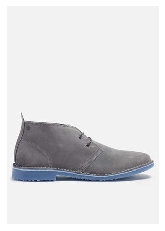

-----------------------------
('suit', 0.6270055)
knitwear


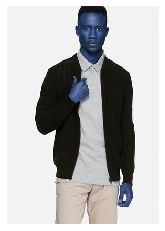

-----------------------------
('running_shoe', 0.9999999)
shoes


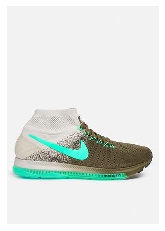

-----------------------------
('cellular_telephone', 0.33810303)
jackets


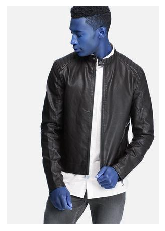

-----------------------------
('trench_coat', 0.44747356)
shirts


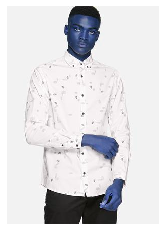

-----------------------------
('Loafer', 0.66130036)
shoes


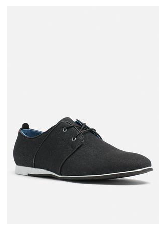

-----------------------------
('jersey', 0.98182076)
tees


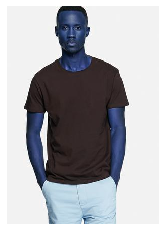

In [0]:
# Create dataset
val_inc_datagen = ImageDataGenerator(preprocessing_function=inception_v3.preprocess_input)
val_inc_generator = val_inc_datagen.flow_from_directory(
        directory=VALID_DATA_PATH,
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode="categorical",
        target_size=(224, 224)
    )

# Buid model
inc_model = inception_v3.InceptionV3(weights='imagenet')
# Get all output for each sample
output = inc_model.predict(val_inc_generator)

# Transform the output vectors to string labels
decode = inception_v3.decode_predictions(output)

paths = val_inc_generator.filepaths
true_labels = val_inc_generator.labels

# Correspondence between output vector and label names
dict_l = val_inc_generator.class_indices

# Get 10 random indexes
idx_list = random.sample(range(len(decode)), 10)

labels = list(dict_l.keys())
for idx in idx_list:
    print("-----------------------------")
    print(decode[idx][0][1:]) # Labels predict and its confidence value
    print(labels[true_labels[idx]]) # true_labels[idx] -> Ixd in one hot encoder
    imshow(imread(paths[idx]))

# MobileNet

Found 382 images belonging to 8 classes.
17227776/17225924 [==============================] - 1s 0us/step
-----------------------------
('running_shoe', 0.95465034)
shoes


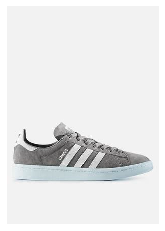

-----------------------------
('sweatshirt', 0.45342788)
knitwear


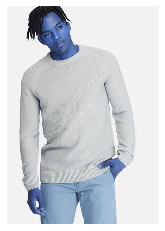

-----------------------------
('suit', 0.7775413)
jackets


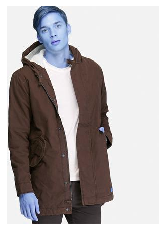

-----------------------------
('jersey', 0.53967476)
tees


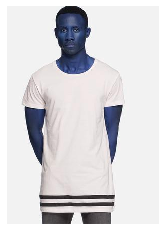

-----------------------------
('analog_clock', 0.8182382)
accessories


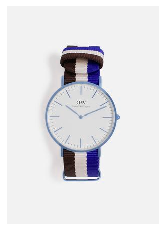

-----------------------------
('jersey', 0.2824744)
tees


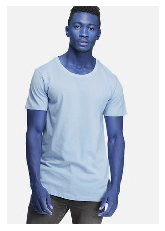

-----------------------------
('bulletproof_vest', 0.6847728)
tees


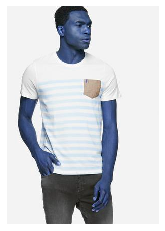

-----------------------------
('knee_pad', 0.4888007)
shoes


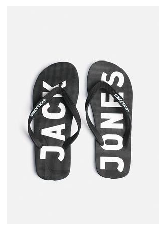

-----------------------------
('jersey', 0.97096336)
tees


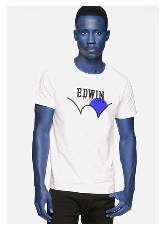

-----------------------------
('jean', 0.9958983)
jeans


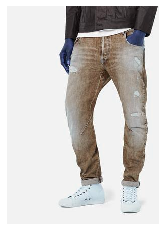

In [0]:
# Create dataset
val_mob_datagen = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input)
val_mob_generator = val_mob_datagen.flow_from_directory(
        directory=VALID_DATA_PATH,
        batch_size=BATCH_SIZE,
        shuffle=False,
        class_mode="categorical",
        target_size=(224, 224)
    )

# Buid model
mob_model = mobilenet.MobileNet(weights='imagenet')
# Get all output for each sample
output = mob_model.predict(val_mob_generator)

# Transform the output vectors to string labels
decode = mobilenet.decode_predictions(output)

paths = val_mob_generator.filepaths
true_labels = val_mob_generator.labels

# Correspondence between output vector and label names
dict_l = val_mob_generator.class_indices

# Get 10 random indexes
idx_list = random.sample(range(len(decode)), 10)

labels = list(dict_l.keys())
for idx in idx_list:
    print("-----------------------------")
    print(decode[idx][0][1:]) # Labels predict and its confidence value
    print(labels[true_labels[idx]]) # true_labels[idx] -> Ixd in one hot encoder
    imshow(imread(paths[idx]))